In [2]:
#https://people.revoledu.com/kardi/tutorial/SVM/SVM+in+Python.html?fbclid=IwAR0Lid2bGfk6oayJb6GF1bJn_lE1VtGNbXEC8c031QL0LRP8-MwONZPXGds_aem_ASvW-sbhv6mADWDPoxPERrQmeD2yhOdUWc36nnNGwLHpFH5uKSvv04myhQwvM9g47pEsz84yM5YYs-7sze9Fr33K#Data
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm
import sklearn.metrics as metric
%matplotlib inline

# Data

In [49]:
filedata=r"D:\downloads dump\featureVectorsMethod3.csv"
data2=pd.read_csv(filedata)
data2

,Unnamed: 0,Mean forehead,Mean left cheek,Mean nose,Mean right cheek,target,Target name
0,0,181.380015,190.480306,221.032873,196.056114,0,non-diabetic
1,1,239.600069,245.815235,239.719844,245.435629,0,non-diabetic
2,2,282.177610,292.722608,275.240949,283.359056,0,non-diabetic
3,3,235.676502,236.602867,242.595706,232.548269,0,non-diabetic
4,4,301.687765,287.266894,309.904455,299.681869,0,non-diabetic
5,5,219.959624,233.988588,224.364214,237.811041,0,non-diabetic
6,6,252.254381,236.465623,224.229241,234.316850,0,non-diabetic
7,7,220.835558,229.725516,208.097886,252.641915,0,non-diabetic
8,8,278.513911,183.547889,257.376913,196.287148,0,non-diabetic
9,9,244.978044,284.169160,253.313790,247.188603,0,non-diabetic


In [50]:
X1=data2['Mean forehead']
X2=data2['Mean left cheek']
X3=data2['Mean nose']
X_training=np.array(list(zip(X1,X2,X3)))
X_training

array([[181.3800153, 190.480306 , 221.0328729],
       [239.6000687, 245.8152351, 239.719844 ],
       [282.1776098, 292.7226082, 275.2409489],
       [235.6765015, 236.602867 , 242.5957064],
       [301.6877647, 287.2668944, 309.9044555],
       [219.9596245, 233.9885881, 224.3642138],
       [252.2543815, 236.4656227, 224.2292406],
       [220.8355581, 229.7255165, 208.0978863],
       [278.5139108, 183.5478886, 257.3769126],
       [244.9780441, 284.16916  , 253.3137899],
       [228.5726633, 224.5431397, 252.0620933],
       [262.3800609, 234.1758939, 279.4499833],
       [243.2607258, 242.6631435, 263.6936818],
       [194.6457144, 196.9471316, 190.7831103],
       [264.1111874, 279.0134104, 258.0890325],
       [253.3259625, 267.4074506, 270.1748689],
       [293.525477 , 304.9411934, 294.5281186],
       [237.3792508, 218.5176106, 230.8003078],
       [291.3774493, 272.4846396, 296.6678165],
       [288.9551085, 263.8799972, 254.2448265],
       [265.2269648, 296.1503926, 254.91

In [51]:
y_training=data2['target']
y_training

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    1
18    1
19    1
20    1
21    1
22    1
23    1
24    1
25    1
26    1
27    1
Name: target, dtype: int64

In [52]:
target_names=['diabetic','nondiabetic']
target_names

['diabetic', 'nondiabetic']

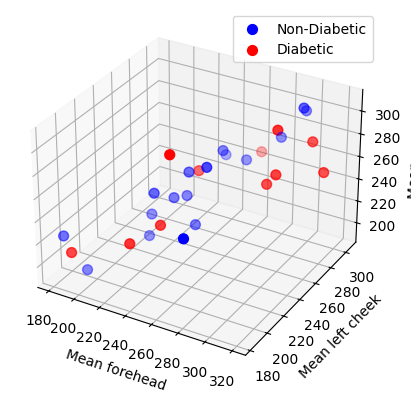

In [53]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Assuming data2 is your DataFrame
X1 = data2['Mean forehead']
X2 = data2['Mean left cheek']
X3 = data2['Mean nose']
y_training = data2['target']  # Assuming you have this variable

# Combine features into one array
X_training = np.array(list(zip(X1, X2, X3)))

# Create a figure and a 3D axis
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Separate indices based on target values
idxPlus = y_training[y_training < 0].index
idxMin = y_training[y_training > 0].index

# Assuming you have y_training as a pandas Series
idx_non_diabetic = y_training[y_training <= 0].index
idx_diabetic = y_training[y_training > 0].index

ax.scatter(X_training[idx_non_diabetic, 0], X_training[idx_non_diabetic, 1], X_training[idx_non_diabetic, 2], c='b', label='Non-Diabetic', s=50)
ax.scatter(X_training[idx_diabetic, 0], X_training[idx_diabetic, 1], X_training[idx_diabetic, 2], c='r', label='Diabetic', s=50)

# Set labels and legend
ax.set_xlabel('Mean forehead')
ax.set_ylabel('Mean left cheek')
ax.set_zlabel('Mean nose')
ax.legend()

# Save or display the plot
plt.savefig('chart0.png')
plt.show()

# SVM Training

In [54]:
svc = svm.SVC(kernel='linear').fit(X_training,y_training)
svc

SVC(kernel='linear')

In [55]:
svc.get_params(True)

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'linear',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [56]:
lbX1 = math.floor(np.min(X1))
ubX1 = math.ceil(np.max(X1))
lbX2 = math.floor(np.min(X2))
ubX2 = math.ceil(np.max(X2))
lbX3 = math.floor(np.min(X3))
ubX3 = math.ceil(np.max(X3))

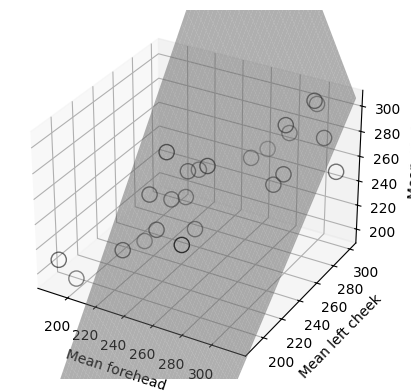

In [57]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.svm import SVC

# Assuming data2 is your DataFrame
X1 = data2['Mean forehead']
X2 = data2['Mean left cheek']
X3 = data2['Mean nose']
y_training = data2['target']  # Assuming you have this variable

# Combine features into one array
X_training = np.array(list(zip(X1, X2, X3)))

# Create a Support Vector Classifier
svc = SVC(kernel='linear')
svc.fit(X_training, y_training)

# Calculate lower and upper bounds for X1, X2, and X3
lbX1 = np.min(X1)
ubX1 = np.max(X1)
lbX2 = np.min(X2)
ubX2 = np.max(X2)
lbX3 = np.min(X3)
ubX3 = np.max(X3)

# Create a figure and a 3D axis
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot decision boundary
x_mesh, y_mesh = np.meshgrid(np.linspace(lbX1, ubX1, 100), np.linspace(lbX2, ubX2, 100))
z_mesh = (-svc.intercept_[0] - svc.coef_[0][0] * x_mesh - svc.coef_[0][1] * y_mesh) / svc.coef_[0][2]
ax.plot_surface(x_mesh, y_mesh, z_mesh, alpha=0.5, color='gray')

# Plot support vectors
ax.scatter(svc.support_vectors_[:, 0], svc.support_vectors_[:, 1], svc.support_vectors_[:, 2], s=120, facecolors='none', edgecolors='k')

# Set labels and legend
ax.set_xlabel('Mean forehead')
ax.set_ylabel('Mean left cheek')
ax.set_zlabel('Mean nose')

# Set boundaries
ax.set_xlim(lbX1, ubX1)
ax.set_ylim(lbX2, ubX2)
ax.set_zlim(lbX3, ubX3)

# Save or display the plot
plt.savefig('margin_and_support_vectors.png')
plt.show()


# Support Vectors

In [58]:
svc.n_support_

array([13, 11])

In [59]:
svc.support_ 

array([ 1,  2,  3,  4,  6,  7,  8, 10, 11, 12, 13, 14, 16, 17, 18, 19, 20,
       21, 22, 23, 24, 25, 26, 27])

In [60]:
svc.support_vectors_

array([[239.6000687, 245.8152351, 239.719844 ],
       [282.1776098, 292.7226082, 275.2409489],
       [235.6765015, 236.602867 , 242.5957064],
       [301.6877647, 287.2668944, 309.9044555],
       [252.2543815, 236.4656227, 224.2292406],
       [220.8355581, 229.7255165, 208.0978863],
       [278.5139108, 183.5478886, 257.3769126],
       [228.5726633, 224.5431397, 252.0620933],
       [262.3800609, 234.1758939, 279.4499833],
       [243.2607258, 242.6631435, 263.6936818],
       [194.6457144, 196.9471316, 190.7831103],
       [264.1111874, 279.0134104, 258.0890325],
       [293.525477 , 304.9411934, 294.5281186],
       [237.3792508, 218.5176106, 230.8003078],
       [291.3774493, 272.4846396, 296.6678165],
       [288.9551085, 263.8799972, 254.2448265],
       [265.2269648, 296.1503926, 254.9109121],
       [294.860393 , 265.2594724, 263.5694843],
       [241.6890412, 223.3036455, 290.4836536],
       [307.4148492, 289.9839435, 280.8503339],
       [224.866709 , 202.0895651, 221.30

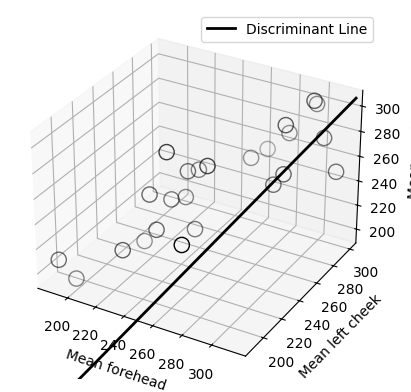

In [61]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.svm import SVC

# Assuming data2 is your DataFrame
X1 = data2['Mean forehead']
X2 = data2['Mean left cheek']
X3 = data2['Mean nose']
y_training = data2['target']  # Assuming you have this variable

# Combine features into one array
X_training = np.array(list(zip(X1, X2, X3)))

# Create a Support Vector Classifier
svc = SVC(kernel='linear')
svc.fit(X_training, y_training)

# Calculate lower and upper bounds for X1, X2, and X3
lbX1 = np.min(X1)
ubX1 = np.max(X1)
lbX2 = np.min(X2)
ubX2 = np.max(X2)
lbX3 = np.min(X3)
ubX3 = np.max(X3)

# Get coefficients and intercept
coef = svc.coef_[0]
intercept = svc.intercept_[0]

# Create a figure and a 3D axis
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot support vectors
ax.scatter(svc.support_vectors_[:, 0], svc.support_vectors_[:, 1], svc.support_vectors_[:, 2], s=120, facecolors='none', edgecolors='k')

# Plot the discriminant line
x_vals = np.array([lbX1, ubX1])
y_vals = np.array([lbX2, ubX2])
z_vals = (-coef[0] * x_vals - coef[1] * y_vals - intercept) / coef[2]
ax.plot(x_vals, y_vals, z_vals, color='k', linestyle='-', linewidth=2, label='Discriminant Line')

# Set labels and legend
ax.set_xlabel('Mean forehead')
ax.set_ylabel('Mean left cheek')
ax.set_zlabel('Mean nose')
ax.legend()

# Set boundaries
ax.set_xlim(lbX1, ubX1)
ax.set_ylim(lbX2, ubX2)
ax.set_zlim(lbX3, ubX3)

# Save or display the plot
plt.savefig('discriminant_line.png')
plt.show()


# Training Performance

In [62]:
from sklearn.metrics import accuracy_score

# Make predictions on the training set
y_pred_train = svc.predict(X_training)

# Calculate normalized accuracy
normalized_accuracy_train = accuracy_score(y_training, y_pred_train)

print("Normalized Accuracy on Training Set:", normalized_accuracy_train)


Normalized Accuracy on Training Set: 0.7142857142857143


In [63]:
y_pred=svc.predict(X_training)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1], dtype=int64)

In [64]:
y_true = y_training
y_true

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    1
18    1
19    1
20    1
21    1
22    1
23    1
24    1
25    1
26    1
27    1
Name: target, dtype: int64

In [65]:
metric.accuracy_score(y_true, y_pred, normalize=False)

20.0

In [66]:
cnf_matrix=metric.confusion_matrix(y_true, y_pred)
cnf_matrix

array([[16,  1],
       [ 7,  4]], dtype=int64)

Confusion matrix, without normalization
[[16  1]
 [ 7  4]]


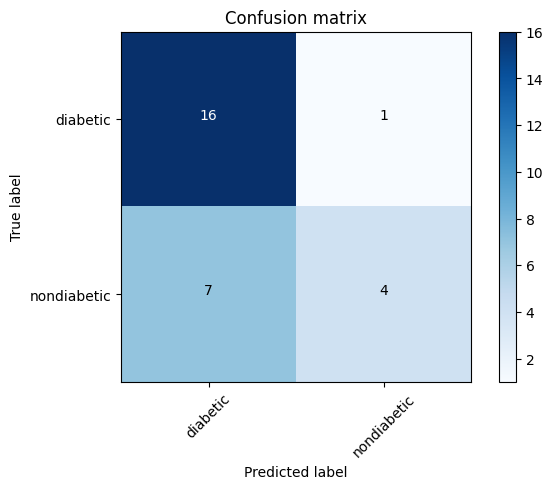

In [67]:
import itertools

# code from http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

    
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=target_names, normalize=False)
plt.show()

# SVM Prediction

In [68]:
X1=data2['Mean forehead']
X2=data2['Mean left cheek']
X3=data2['Mean nose']
X_training=np.array(list(zip(X1,X2,X3)))
X_training

array([[181.3800153, 190.480306 , 221.0328729],
       [239.6000687, 245.8152351, 239.719844 ],
       [282.1776098, 292.7226082, 275.2409489],
       [235.6765015, 236.602867 , 242.5957064],
       [301.6877647, 287.2668944, 309.9044555],
       [219.9596245, 233.9885881, 224.3642138],
       [252.2543815, 236.4656227, 224.2292406],
       [220.8355581, 229.7255165, 208.0978863],
       [278.5139108, 183.5478886, 257.3769126],
       [244.9780441, 284.16916  , 253.3137899],
       [228.5726633, 224.5431397, 252.0620933],
       [262.3800609, 234.1758939, 279.4499833],
       [243.2607258, 242.6631435, 263.6936818],
       [194.6457144, 196.9471316, 190.7831103],
       [264.1111874, 279.0134104, 258.0890325],
       [253.3259625, 267.4074506, 270.1748689],
       [293.525477 , 304.9411934, 294.5281186],
       [237.3792508, 218.5176106, 230.8003078],
       [291.3774493, 272.4846396, 296.6678165],
       [288.9551085, 263.8799972, 254.2448265],
       [265.2269648, 296.1503926, 254.91

In [69]:
# Define the test data
X_test = np.array([[189.9784821, 187.3654541, 211.5886624]])

# Predict the class label for the test data
y_pred_test = svc.predict(X_test)

print("Predicted class label for the test data:", y_pred_test)

Predicted class label for the test data: [0]


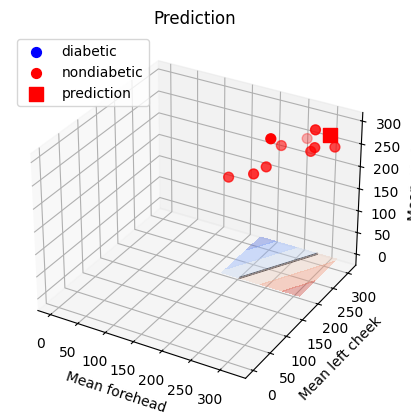

In [70]:
idxPlus = y_training[y_training < 0].index
idxMin = y_training[y_training > 0].index

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for class '-1' (idxPlus) in blue
ax.scatter(X_training[idxPlus, 0], X_training[idxPlus, 1], X_training[idxPlus, 2], c='b', s=50)

# Scatter plot for class '+1' (idxMin) in red
ax.scatter(X_training[idxMin, 0], X_training[idxMin, 1], X_training[idxMin, 2], c='r', s=50)

# Scatter plot for prediction point in red with square marker
ax.scatter(307.563317 , 290.1524386, 281.0493429, c='r', marker='s', s=90)

# Legend for scatter plots
ax.legend(['diabetic', 'nondiabetic', 'prediction'], loc=2)

# Create meshgrid for decision boundary
X, Y, Z = np.mgrid[lbX1:ubX1:100j, lbX2:ubX2:100j, lbX3:ubX3:100j]
XYZ = np.column_stack([X.ravel(), Y.ravel(), Z.ravel()])
Z_values = svc.decision_function(XYZ).reshape(X.shape)

# Select a specific slice of Z_values to plot as contour plot
z_slice = Z_values[:, :, 0]

# Contour plot for decision boundary
ax.contourf(X[:, :, 0], Y[:, :, 0], z_slice, zdir='z', offset=np.min(Z_values), cmap='coolwarm', alpha=0.4)
ax.contour(X[:, :, 0], Y[:, :, 0], z_slice, colors=['k'], linestyles=['-'], levels=[0], zdir='z', offset=np.min(Z_values))

# Set labels and title
ax.set_xlabel('Mean forehead')
ax.set_ylabel('Mean left cheek')
ax.set_zlabel('Mean nose')
ax.set_title('Prediction')

# Save the plot
plt.savefig('chart3.png')

# Show the plot
plt.show()

In [71]:
import pickle

# Save the model to a file
with open('svm_model.pkl', 'wb') as file:
    pickle.dump(svc, file)